In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import pydataset 
from pydataset import data

In [23]:
#Use the iris database to answer the following quesitons:
#load directly from sns dataset
iris = sns.load_dataset('iris')

In [16]:
#load using pydataset
iris = data('iris')

In [17]:
data('iris', show_doc = True)

iris

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Edgar Anderson's Iris Data

### Description

This famous (Fisher's or Anderson's) iris data set gives the measurements in
centimeters of the variables sepal length and width and petal length and
width, respectively, for 50 flowers from each of 3 species of iris. The
species are _Iris setosa_, _versicolor_, and _virginica_.

### Usage

    iris
    iris3

### Format

`iris` is a data frame with 150 cases (rows) and 5 variables (columns) named
`Sepal.Length`, `Sepal.Width`, `Petal.Length`, `Petal.Width`, and `Species`.

`iris3` gives the same data arranged as a 3-dimensional array of size 50 by 4
by 3, as represented by S-PLUS. The first dimension gives the case number
within the species subsample, the second the measurements with names `Sepal
L.`, `Sepal W.`, `Petal L.`, and `Petal W.`, and the third the species.

### Source

Fisher, R. A. (1936) The use of multiple measurements in taxonomi

In [24]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [25]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [192]:
iris.species.value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

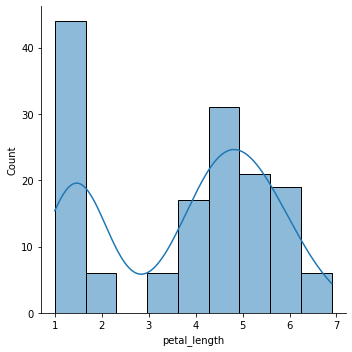

In [27]:
#1. What does the distribution of petal lengths look like?
sns.displot(iris.petal_length, kde=True)

#shows a bimodel distribution

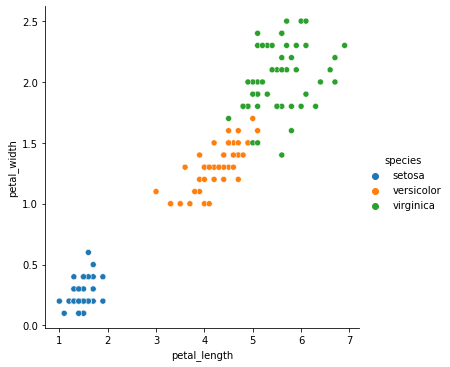

In [193]:
#2. Is there a correlation between petal length and petal width?
sns.relplot(data = iris, x = 'petal_length', y = 'petal_width', hue='species')

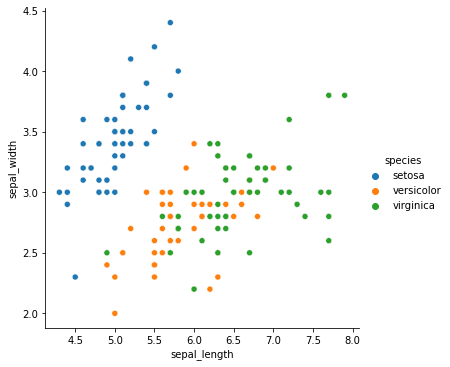

In [194]:
#3. Would it be reasonable to predict species based on sepal width and sepal length?
sns.relplot(data = iris, x = 'sepal_length', y = 'sepal_width', hue = 'species')

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

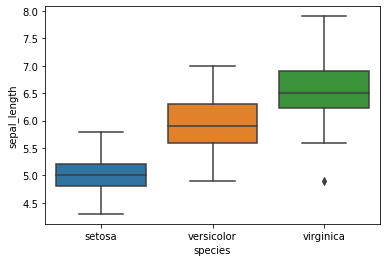

In [195]:
#4. Which features would be best used to predict species?
sns.boxplot(y = 'sepal_length', x = 'species', data = iris)

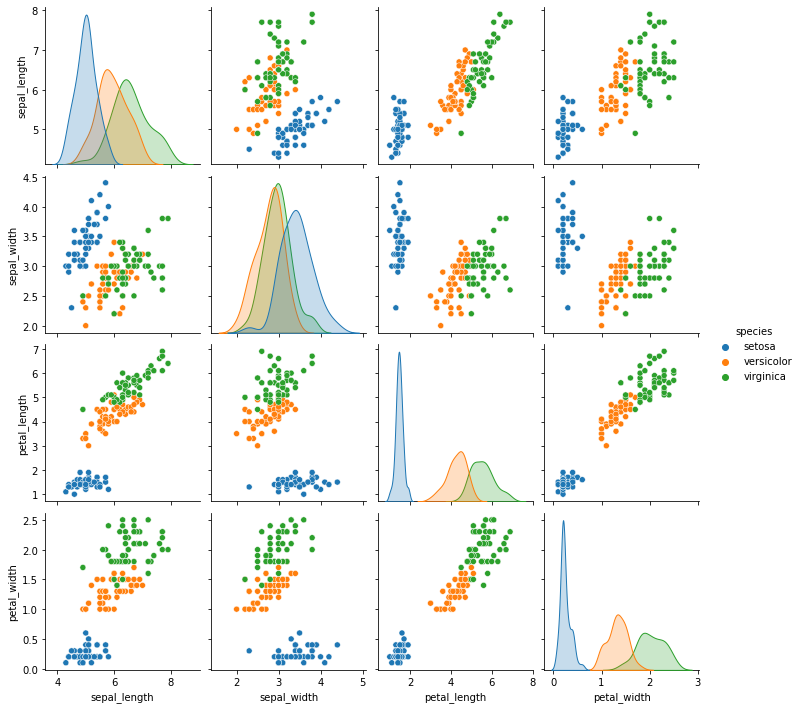

In [196]:
#more useful to do pairplot
sns.pairplot(data = iris, hue = 'species')

In [7]:
#######################################################################

In [37]:
#1. Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?

#load directly from sns dataset
anscombe = sns.load_dataset('anscombe')
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [197]:
#use pandas to group data by dataset column
#calc summary statistics for each dataset

anscombe.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

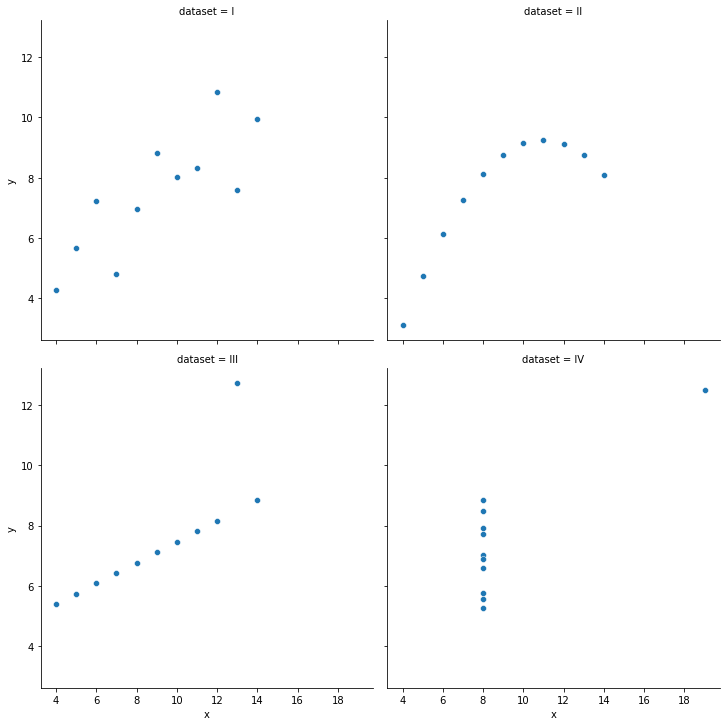

In [44]:
#1 contd Plot the x and y values from the anscombe data. 
#Each dataset should be in a separate column.

sns.relplot(data = anscombe, x = 'x', y = 'y', col = 'dataset', col_wrap=2)


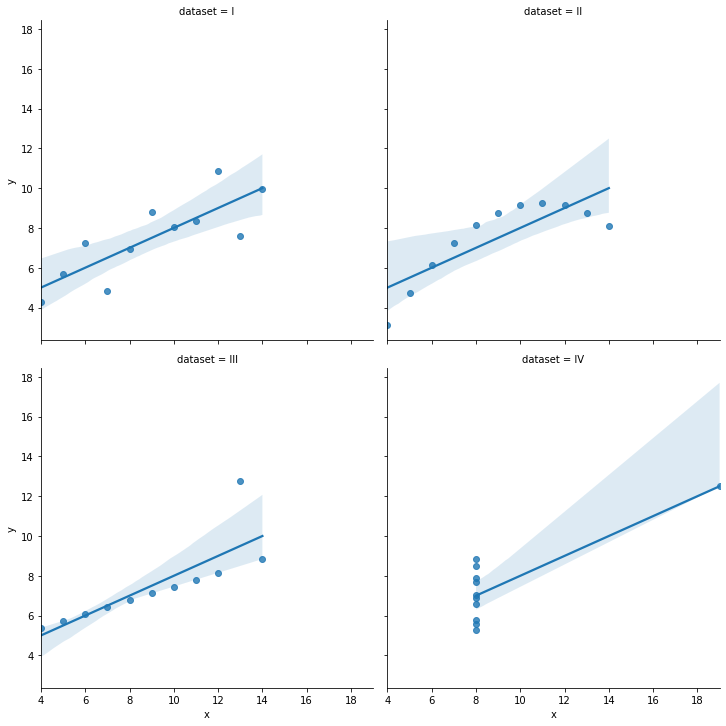

In [200]:
sns.lmplot(data = anscombe, x = 'x', y = 'y', col = 'dataset', col_wrap=2)
#lmplot shows regression line and shows us outliers change the regression lines
#keep in mind: outliers can skew distribution or regression line

In [47]:
#2. Load the InsectSprays dataset and read it's documentation. 
#InsectSprays is in pydataset

InsectSprays = data('InsectSprays')

data('InsectSprays', show_doc = True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

In [48]:
InsectSprays.head()

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


In [57]:
InsectSprays.spray.describe()

count     72
unique     6
top        D
freq      12
Name: spray, dtype: object

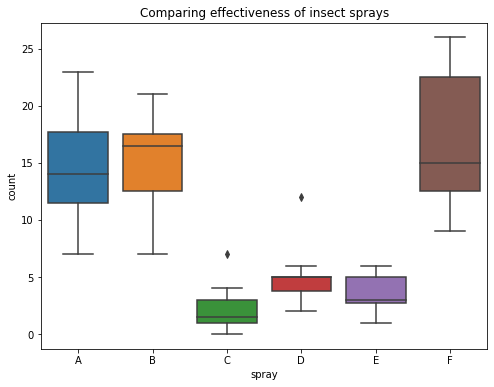

In [201]:
# Create a boxplot that shows the effectiveness of the different insect sprays.
plt.figure(figsize=(8, 6))

sns.boxplot(data = InsectSprays, x='spray', y='count')

plt.title('Comparing effectiveness of insect sprays')

plt.show()
#using boxplot since we are comparing different categories

In [59]:
#3. Load the swiss dataset and read it's documentation. 
#Create visualizations to answer the following questions:
#swiss is in pydataset

swiss = data('swiss')

data('swiss', show_doc = True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

### find out what each column means:

Fertility: ‘common standardized fertility measure’  
Agriculture: % of males involved in agriculture as occupation  
Examination: % draftees receiving highest mark on army examination  
Education: % education beyond primary school for draftees.  
Catholic: % ‘catholic’ (as opposed to ‘protestant’).  
Infant.Mortality: live births who live less than 1 year.  

In [203]:
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False


In [64]:
#3a. Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. 
#(Choose a cutoff point for what constitutes catholic)
swiss['is_catholic'] = swiss.Catholic > 50
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False


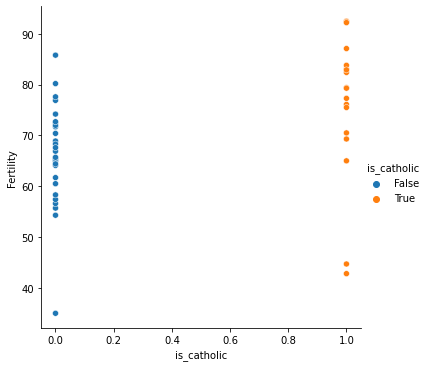

In [69]:
#3b. Does whether or not a province is Catholic influence fertility?

sns.relplot(data = swiss, x = 'is_catholic', y = 'Fertility', hue='is_catholic')

<AxesSubplot:xlabel='is_catholic', ylabel='Fertility'>

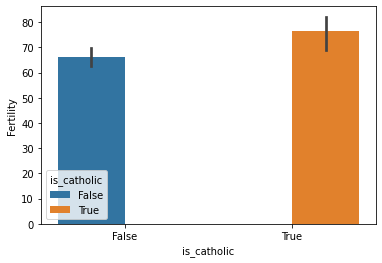

In [77]:
sns.barplot(data = swiss, x = 'is_catholic', y = 'Fertility', hue='is_catholic')

<AxesSubplot:xlabel='is_catholic', ylabel='Fertility'>

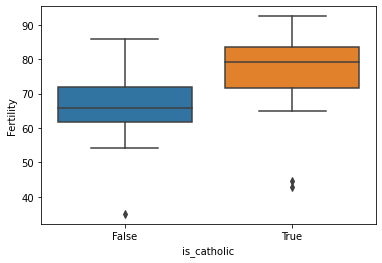

In [204]:
sns.boxplot(x = 'is_catholic', y = 'Fertility', data = swiss)

#we do see a difference in terms of a median
#fertility is higher for catholics

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


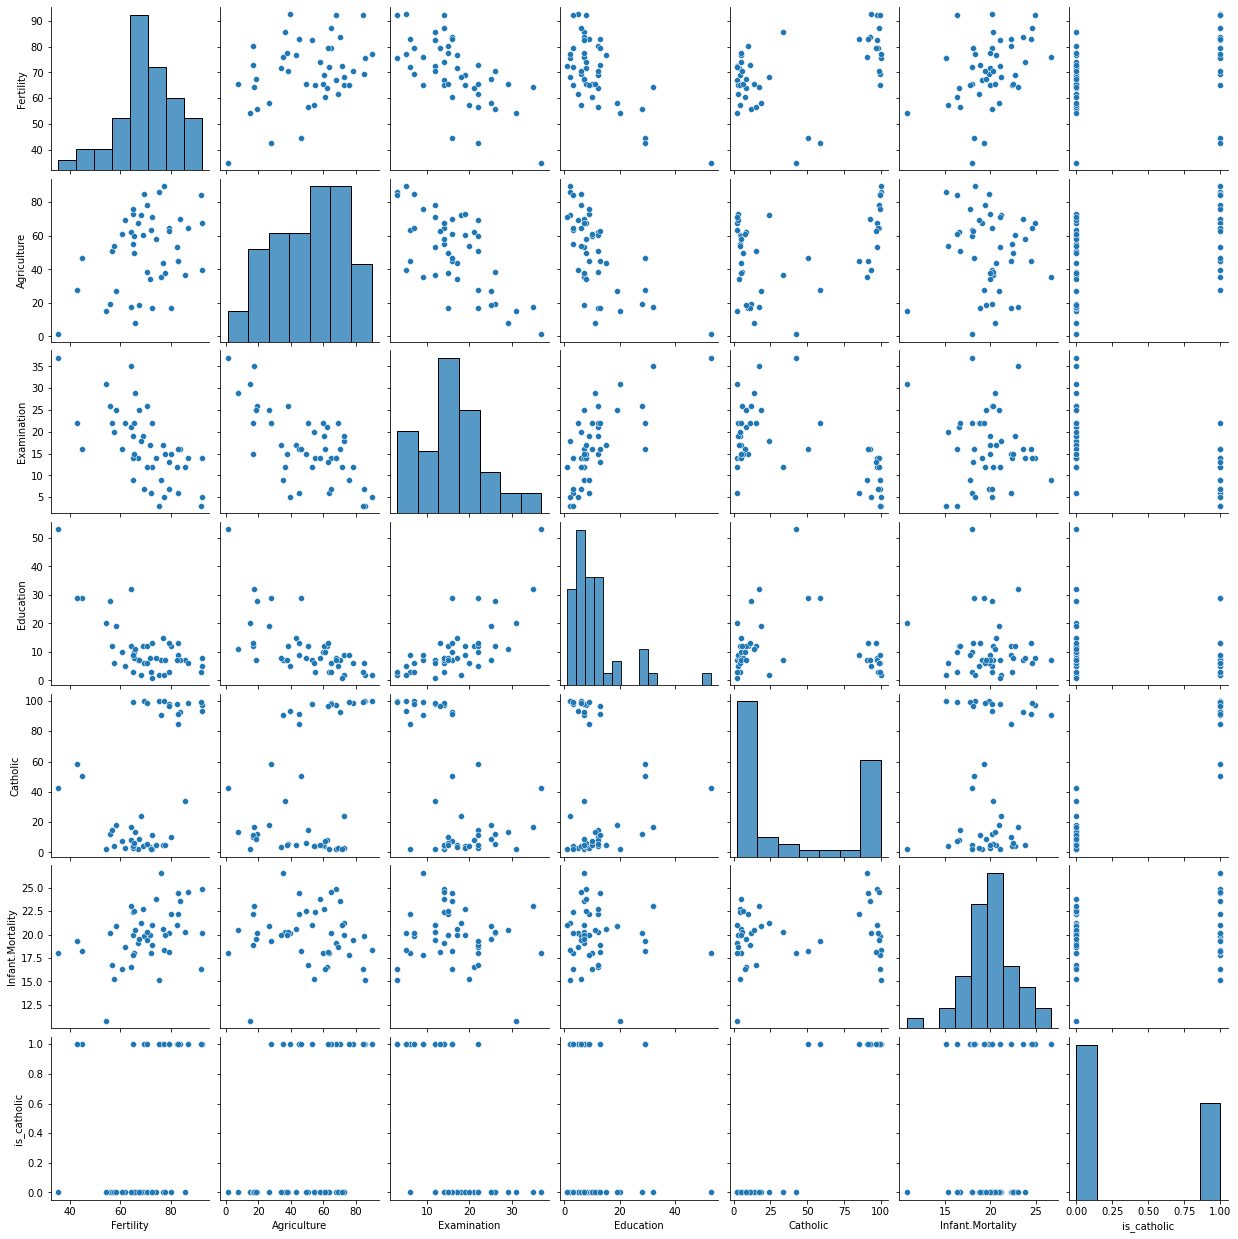

In [79]:
#3c. What measure correlates most strongly with fertility?
sns.pairplot(swiss)

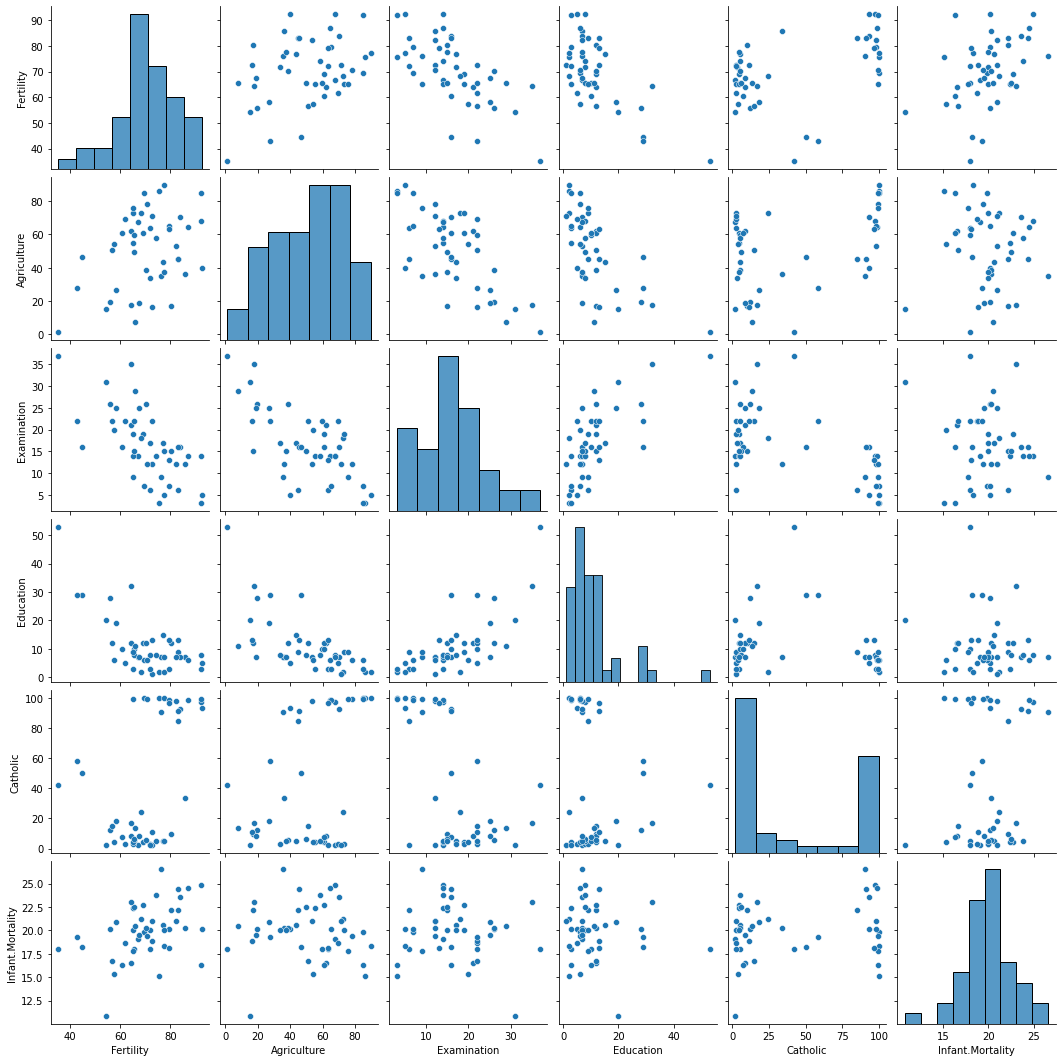

In [205]:
#alternate:
sns.pairplot(data = swiss.iloc[:, :-1])
                                #minues the last one(boolean plot

In [ ]:
# We can also make individual plots

# for col in swiss.columns[1:-1]:
#     sns.relplot(data = swiss, y = 'Fertility', x = col)

In [206]:
swiss.corr().Fertility
#interested in correlation w/ fertility

#education and examination are negatively correlated

Fertility           1.000000
Agriculture         0.353079
Examination        -0.645883
Education          -0.663789
Catholic            0.463685
Infant.Mortality    0.416556
is_catholic         0.402813
Name: Fertility, dtype: float64

In [127]:
#4. Using the chipotle dataset from the previous exercise, 

from env import host, user, password

In [128]:
def get_db_url(user, host, password, db):
    url = f'mysql+pymysql://{user}:{password}@{host}/{db}'
    return url

In [129]:
chipotle_sql = """
select *
from orders;
"""

orders = pd.read_sql(chipotle_sql, get_db_url(user, host, password, 'chipotle'))
orders.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [130]:
#4. contd. create a bar chart that shows the 4 most popular items 
            #and the revenue produced by each.


#stp 1: convert price to a float:
orders['item_price'] = orders.item_price.str.replace('$', '').astype(float)


In [131]:
#stp 2: get order totals:
order_totals = orders.groupby('order_id').item_price.sum()
order_totals

order_id
1       11.56
2       16.98
3       12.67
4       21.00
5       13.70
        ...  
1830    23.00
1831    12.90
1832    13.20
1833    23.50
1834    28.75
Name: item_price, Length: 1834, dtype: float64

In [132]:
#stp3: create variable for top 4 most popular items
top_four=orders.groupby('item_name').quantity.sum().sort_values(ascending=False).head(4)

top_four

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Name: quantity, dtype: int64

In [207]:
top_four.index
#add to cell below:

Index(['Chicken Bowl', 'Chicken Burrito', 'Chips and Guacamole',
       'Steak Burrito'],
      dtype='object', name='item_name')

In [209]:
#stp4: get revenue produced by top four most popular items
revenue = orders[orders.item_name.isin(top_four.index)].groupby('item_name').item_price.sum()
revenue

item_name
Chicken Bowl           7342.73
Chicken Burrito        5575.82
Chips and Guacamole    2201.04
Steak Burrito          3851.43
Name: item_price, dtype: float64

In [210]:
#stp5: reset index to make into dataframe:
revenue = revenue.sort_values(ascending = False).reset_index()
revenue

,item_name,item_price
0,Chicken Bowl,7342.73
1,Chicken Burrito,5575.82
2,Steak Burrito,3851.43
3,Chips and Guacamole,2201.04


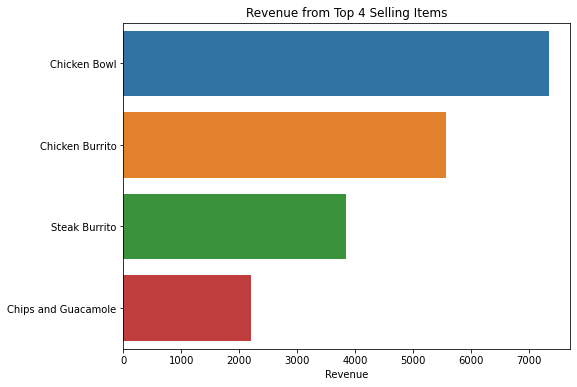

In [216]:
#stp6: create bar chart that shows the 4 most popular items & the revenue produced by each.
plt.figure(figsize=(8, 6))

sns.barplot(data=revenue, x='item_price', y='item_name')

plt.title('Revenue from Top 4 Selling Items')
plt.xlabel('Revenue')
plt.ylabel('') #empty to get rid of the column_name ('item_name')

plt.show()

In [227]:
#5. Load the sleepstudy data and read it's documentation. 
#Use seaborn to create a line chart of all the individual subject's reaction times and a more prominent line showing the average change in reaction time.

sleepstudy = data('sleepstudy')

data('sleepstudy', show_doc = True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

In [228]:
sleepstudy.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [229]:
sleepstudy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1 to 180
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reaction  180 non-null    float64
 1   Days      180 non-null    int64  
 2   Subject   180 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 5.6 KB


In [233]:
#Use seaborn to create a line chart of all the individual 
#subject's reaction times and a more prominent line 
#showing the average change in reaction time.

#stp1: convert 'Subject' to str object instead of int
sleepstudy['Subject'] = sleepstudy.Subject.astype(str)

sleepstudy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1 to 180
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reaction  180 non-null    float64
 1   Days      180 non-null    int64  
 2   Subject   180 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 5.6+ KB


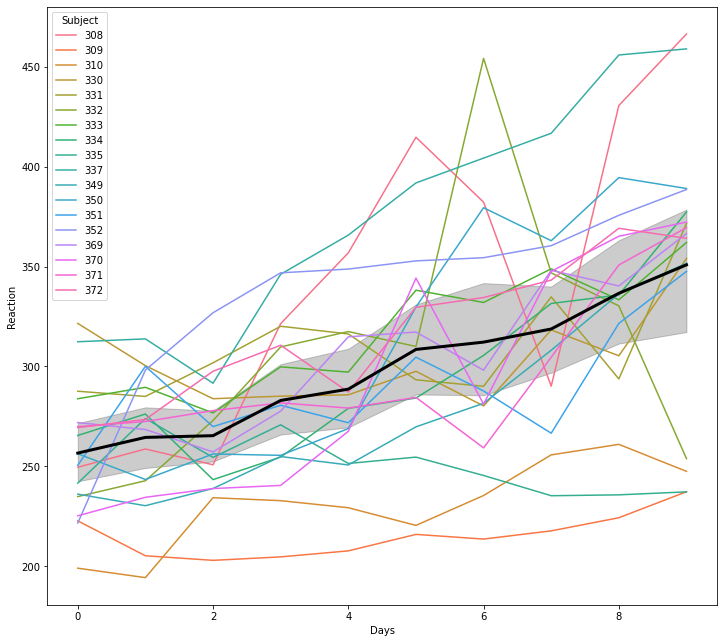

In [256]:
#stp2: create line chart w/ average change in reaction time:
plt.figure(figsize=(12, 11))

#this shows all subject's reaction time: 
sns.lineplot(data = sleepstudy, x = 'Days', y = 'Reaction', 
             hue = 'Subject')

#this shows average change in reaction time (kwarg: estimator='mean')
sns.lineplot(data = sleepstudy, x = 'Days', y = 'Reaction', 
             color = 'black', ls = '-', lw=3, estimator = 'mean')

plt.legend(title='Subject')
plt.show()